# K-Means Clustering

K- Means is a simple yet robust technique that can be used to classify unlabelled data. 

### Importing Libraries and data

In [17]:
%matplotlib inline

from azureml import Workspace
from copy import deepcopy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

ws = Workspace()
ds = ws.datasets['cc_general.csv']
credit = ds.to_dataframe()

credit.head(7)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12


### Exploring Data

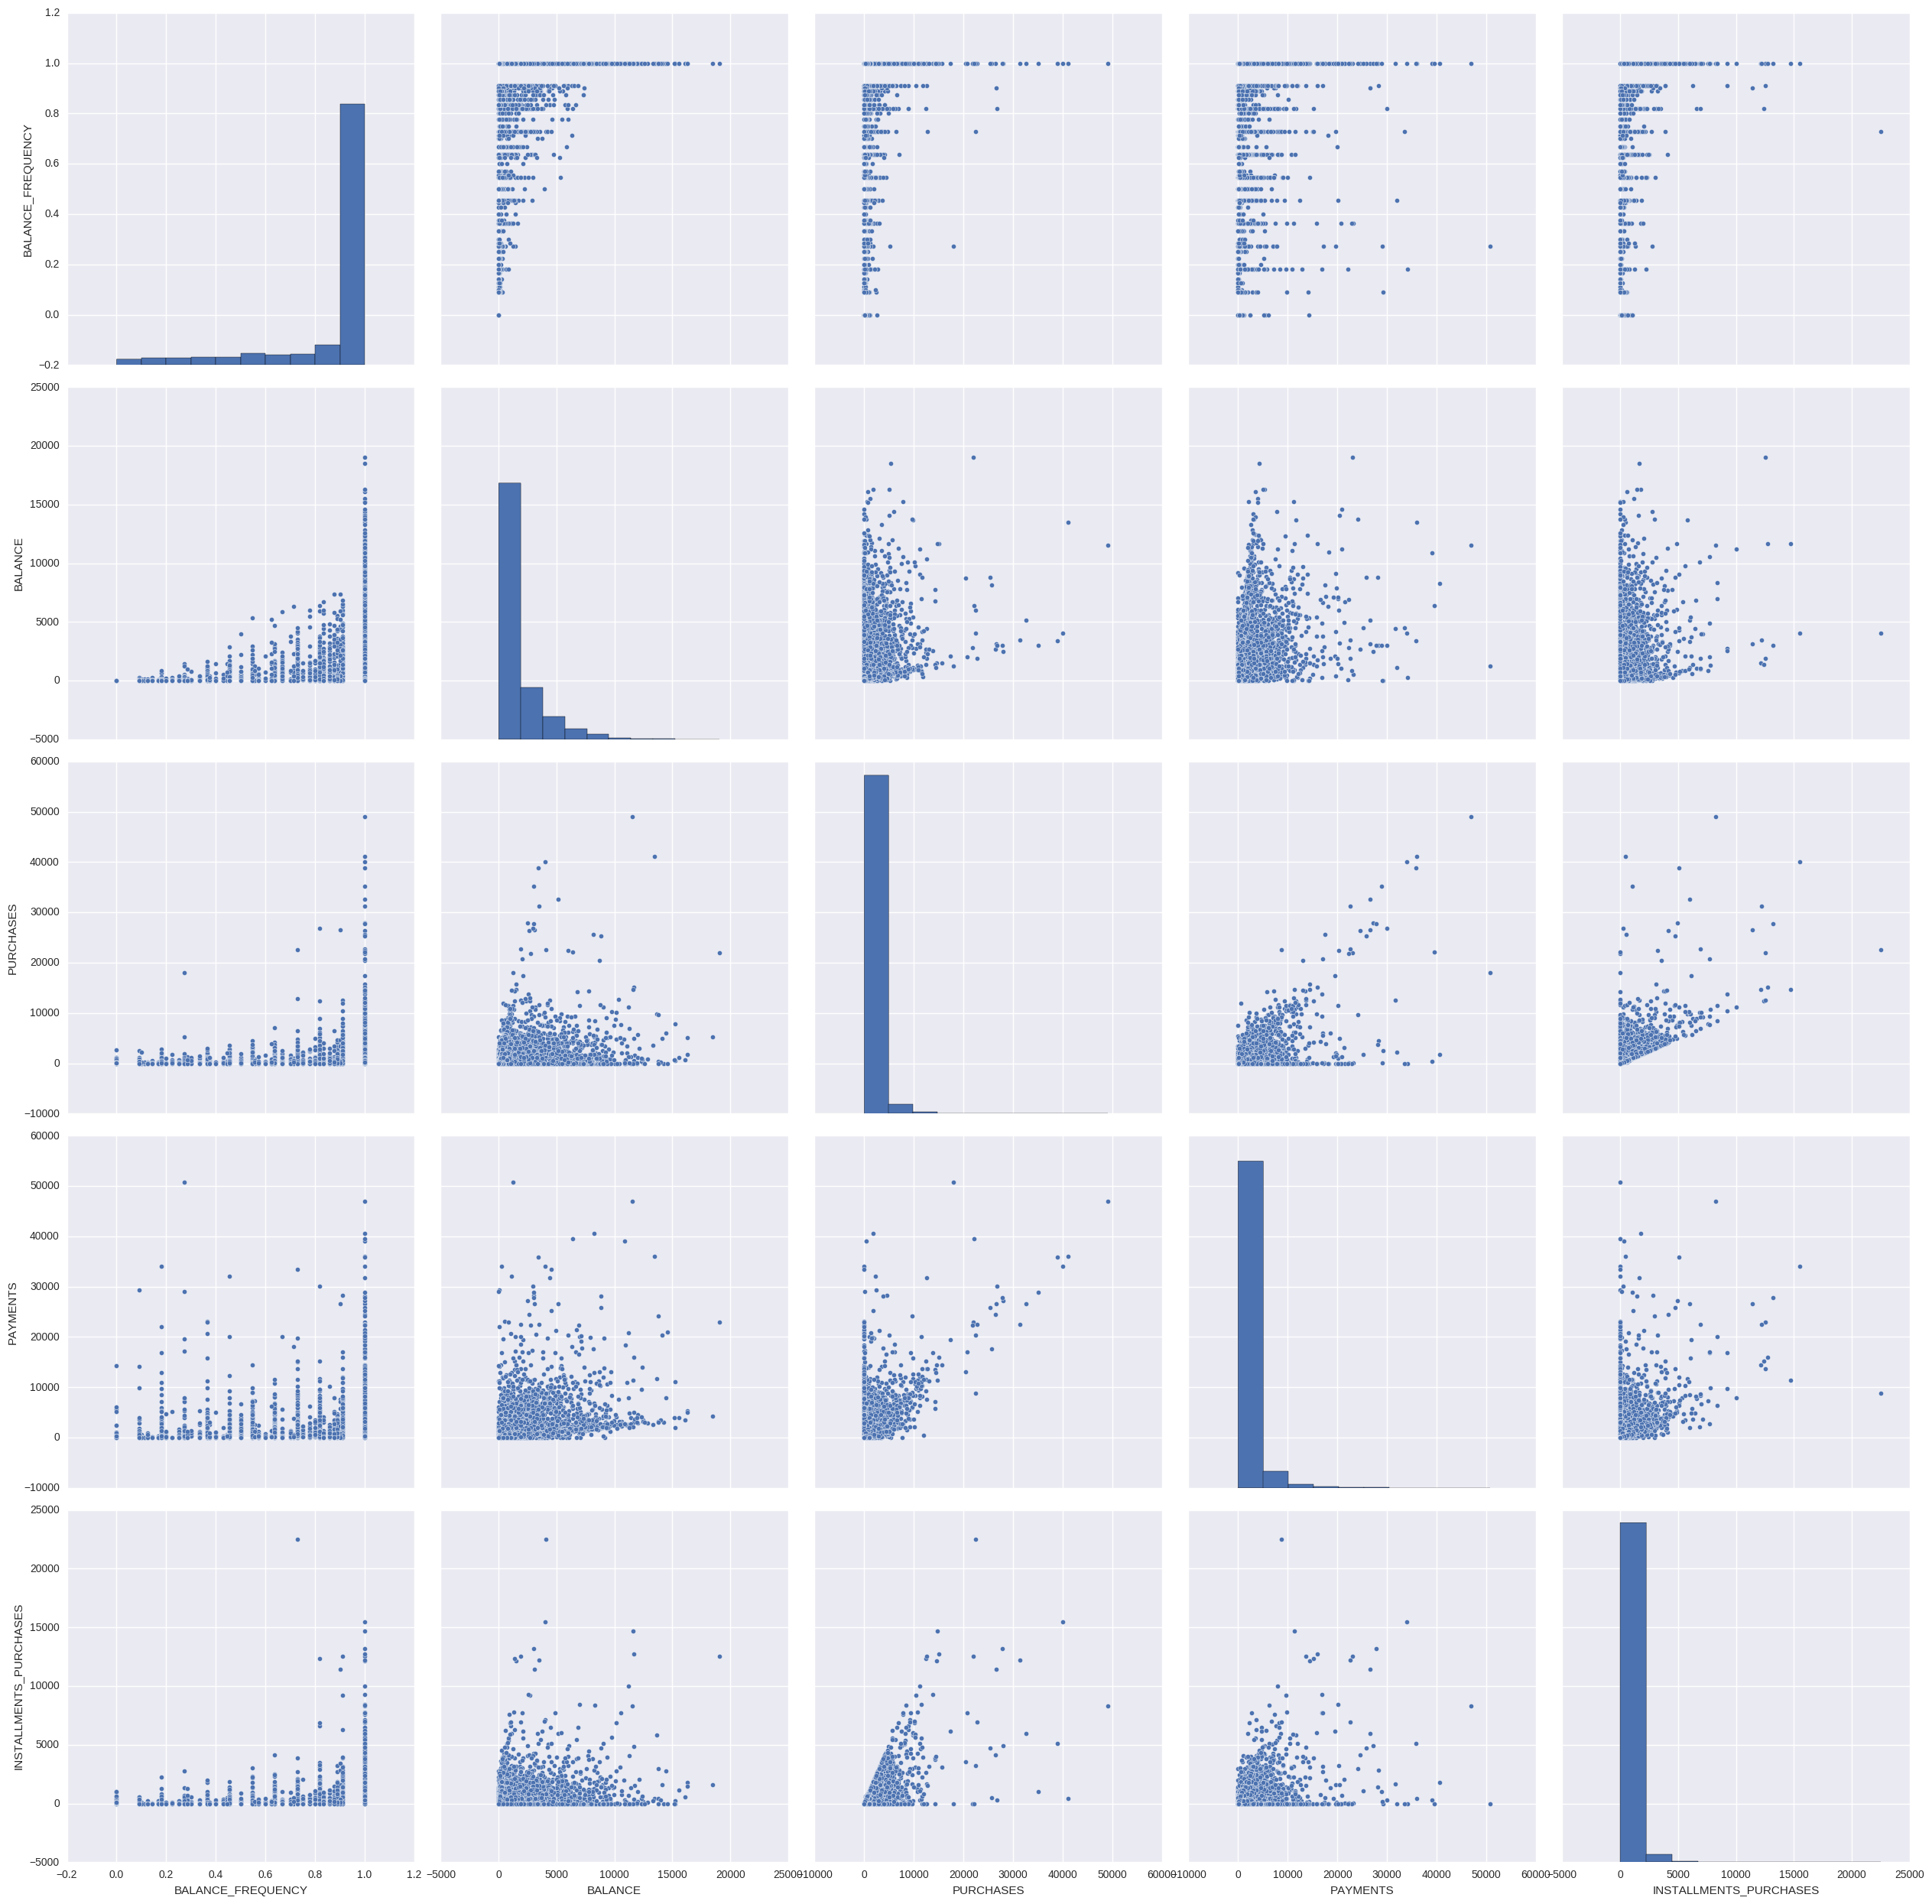

In [18]:
import seaborn as sns
num_cols = ["BALANCE_FREQUENCY", "BALANCE", "PURCHASES", "PAYMENTS", "INSTALLMENTS_PURCHASES"] 
sns.pairplot(credit[num_cols], size=5)

### Getting the values and plotting

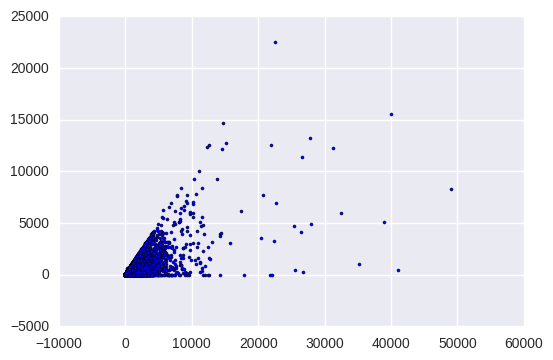

In [19]:
feature1 = credit['PURCHASES'].values
feature2 = credit['INSTALLMENTS_PURCHASES'].values
X = np.array(list(zip(feature1, feature2)))
plt.scatter(feature1, feature2, c='blue', s=5)

### Distance Calculator

In [20]:

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

### Cluster And Centroid

In [21]:
k = 4                                               # Number of clusters
C_x = [0, 20000, 627.2847871, 20000]                # X coordinates of random centroids
C_y = [0, 5000, 2495.148862, 20000]                 # Y coordinates of random centroids
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[     0.              0.        ]
 [ 20000.           5000.        ]
 [   627.28479004   2495.14892578]
 [ 20000.          20000.        ]]


### Plotting along with the Centroids

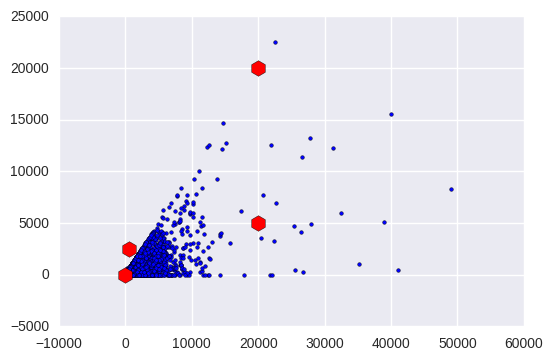

In [22]:
plt.scatter(feature1, feature2, c='blue', s=7)
plt.scatter(C_x, C_y, marker='h', s=125, c='red')

### Clustering Algorithm

In [23]:
C_old = np.zeros(C.shape)                 # To store the value of centroids when it updates

clusters = np.zeros(len(X))               # Cluster Lables(starting from 0)

error = dist(C, C_old, None)              # Error func. - Distance between new centroids and old centroids

while error != 0:          
    for i in range(len(X)):               # Assigning each value to its closest cluster
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)                    # Storing the old centroid values
    
    for i in range(k):                     # Finding the new centroids by taking the average value
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

### Final Plot

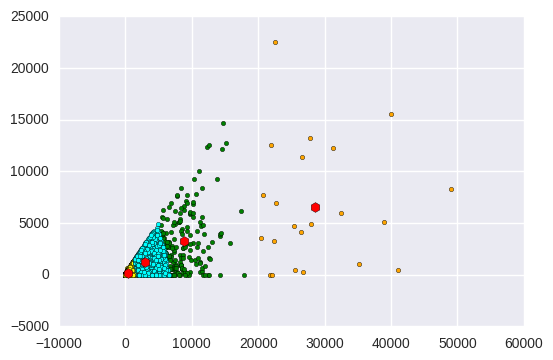

In [26]:
colors = ['yellow', 'green', 'cyan', 'orange', 'gray', 'magenta']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='h', s=50, c='red')

-
programmed by Darshan Maru.